# Padding and Decimate: Generator to Scope

In [274]:
exec(open('ComputeDelays.py').read())

# Generator to Scope - 2 us - 500 kHz

GS_4=timedata('GS_4')
readlabdat('jun27_2.csv',GS_4)

GS_C=timedata('GS_C')
readlabdat('jun27_3.csv',GS_C)

Text(0.5, 1.0, 'Raw Data')

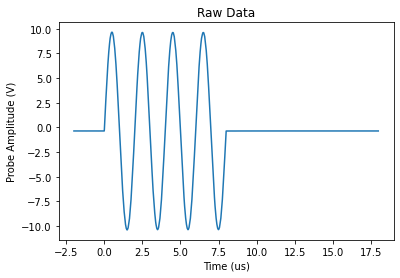

In [275]:
# Plots:

# 1) raw data

plt.plot(GS_4.time*1e6,GS_4.data)

plt.xlabel('Time (us)')
plt.ylabel('Probe Amplitude (V)')
plt.title('Raw Data')

Text(0.5, 1.0, 'Raw Data')

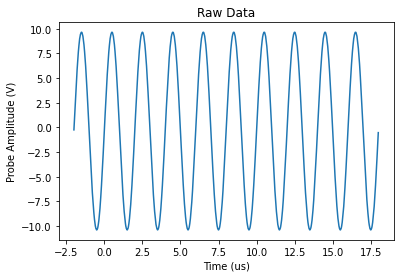

In [276]:
plt.plot(GS_C.time*1e6,GS_C.data)

plt.xlabel('Time (us)')
plt.ylabel('Probe Amplitude (V)')
plt.title('Raw Data')

In [277]:
# 2) decimated data

#from scipy import signal
#y_decimated = signal.decimate(GS_4.data, 10)  * weird, changes all numbers
#x_decimated = signal.decimate(GS_4.time, 10)

def decimate(lst,N):  # Not actually decimating - deleting up to half of all points
    del lst[N-1::N]
    return lst

In [278]:
# New decimate function that actually decimates: keeps every 10th point
def decimate(lst):
    lst = lst[::10]
    return lst 

Text(0.5, 1.0, 'Decimated Data')

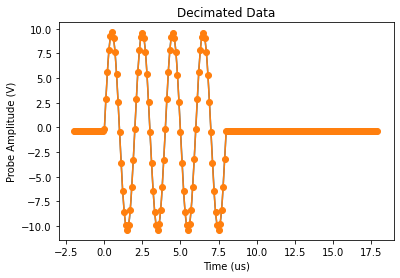

In [279]:
y = list(GS_4.data)
x = list(GS_4.time)
y_decimated = decimate(y) 
x_decimated = decimate(x) 
y_decimated = np.array(y_decimated)
x_decimated = np.array(x_decimated)

plt.plot(GS_4.time*1e6,GS_4.data)
plt.plot(x_decimated*1e6,y_decimated,'-o')

#plt.legend()
plt.xlabel('Time (us)')
plt.ylabel('Probe Amplitude (V)')
plt.title('Decimated Data')

Text(0.5, 1.0, 'Padded Data')

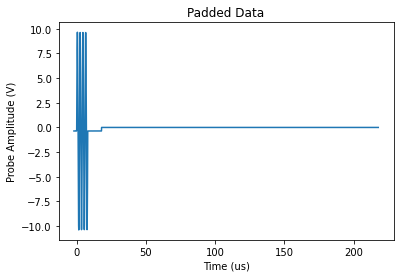

In [340]:
# 3) padded and decimated data

zero_num = 2000   # number of zero points we need to add
y_pad = np.pad(y_decimated,zero_num) # np.pad adds zero to both ends
y_pad = y_pad[zero_num:len(y_pad)]   # cut the leading zeros

dx = x_decimated[2]-x_decimated[1]   # dt, spacing between time points
#dx = GS_4.time[2]-GS_4.time[1] 
newtimes = np.zeros(zero_num)
for i in range(1,zero_num + 1):      # extend time array to accomodate padding
    newtimes[i-1]= x_decimated[len(x_decimated)-1] + i*dx

x_pad = np.append(x_decimated,newtimes)

plt.plot(x_pad*1e6,y_pad)
plt.xlabel('Time (us)')
plt.ylabel('Probe Amplitude (V)')
plt.title('Padded Data')

In [341]:
x_pad[-1]*1e6

217.9000000000002

In [342]:
x_decimated[-1]-x_decimated[-2]

1.0000000000000243e-07

# FFT of Raw Data 

In [343]:
# FFT
n_GS_4=np.size(GS_4.time)
dt_GS_4=(GS_4.time[2]-GS_4.time[1])*1e6
f_GS_4=np.fft.fftshift(np.fft.fftfreq(n_GS_4,d=dt_GS_4))*1000
FT_GS_4=np.fft.fftshift(np.fft.fft(GS_4.data - np.mean(GS_4.data)))

n_GS_C=np.size(GS_C.time)
dt_GS_C=(GS_C.time[2]-GS_C.time[1])*1e6
f_GS_C=np.fft.fftshift(np.fft.fftfreq(n_GS_C,d=dt_GS_C))*1000
FT_GS_C=np.fft.fftshift(np.fft.fft(GS_C.data - np.mean(GS_C.data)))

Text(0.5, 1.0, 'Raw Data FFT')

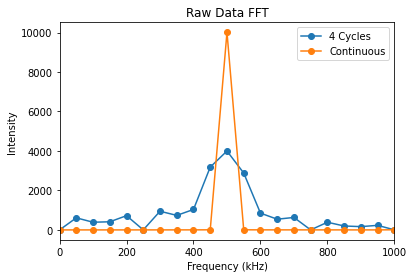

In [344]:
plt.plot(f_GS_4,np.abs(FT_GS_4),'-o', label="4 Cycles")
plt.plot(f_GS_C,np.abs(FT_GS_C),'-o', label="Continuous")

plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Raw Data FFT')

# FFT of Decimated Data

In [345]:
# FFT
n_GS_4_dec=np.size(x_decimated)
dt_GS_4_dec=(x_decimated[2]-x_decimated[1])*1e6
f_GS_4_dec=np.fft.fftshift(np.fft.fftfreq(n_GS_4_dec,d=dt_GS_4_dec))*1000
FT_GS_4_dec=np.fft.fftshift(np.fft.fft(y_decimated - np.mean(y_decimated)))


Text(0.5, 1.0, 'Decimated Data FFT')

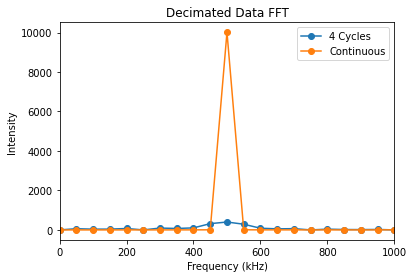

In [346]:
plt.plot(f_GS_4_dec,np.abs(FT_GS_4_dec),'-o', label="4 Cycles")
plt.plot(f_GS_C,np.abs(FT_GS_C),'-o', label="Continuous")

plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Decimated Data FFT')

# FFT of Padded and Decimated Data

In [347]:
# FFT
n_GS_4_pad=np.size(x_pad)
dt_GS_4_pad=(x_pad[2]-x_pad[1])*1e6
f_GS_4_pad=np.fft.fftshift(np.fft.fftfreq(n_GS_4_pad,d=dt_GS_4_pad))*1000
FT_GS_4_pad=np.fft.fftshift(np.fft.fft(y_pad - np.mean(y_pad)))


Text(0.5, 1.0, 'Decimated+Padded Data FFT')

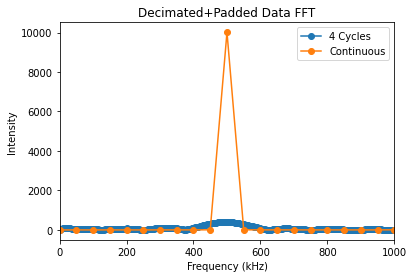

In [348]:
plt.plot(f_GS_4_pad,np.abs(FT_GS_4_pad),'-o', label="4 Cycles")
plt.plot(f_GS_C,np.abs(FT_GS_C),'-o', label="Continuous")

plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Decimated+Padded Data FFT')

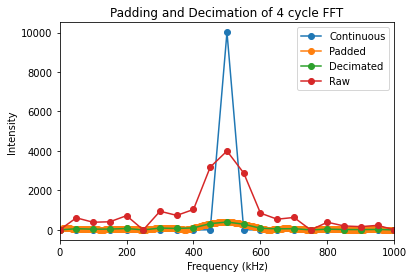

In [349]:
# condensed all onto one plot:
plt.plot(f_GS_C,np.abs(FT_GS_C),'-o', label="Continuous")
plt.plot(f_GS_4_pad,np.abs(FT_GS_4_pad),'-o', label="Padded")
plt.plot(f_GS_4_dec,np.abs(FT_GS_4_dec),'-o', label="Decimated")
plt.plot(f_GS_4,np.abs(FT_GS_4),'-o', label="Raw")

plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Padding and Decimation of 4 cycle FFT')
plt.savefig("Pad&Dec_GS.jpg",dpi=300)

Text(0.5, 1.0, 'Padded Data FFT')

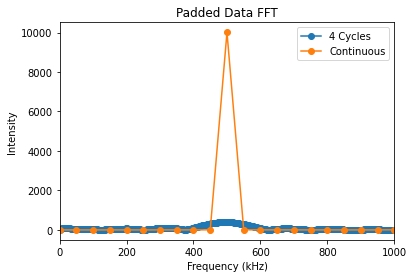

In [209]:
# try padding with more zeros:

zero_num = 2000 - len(y_decimated)     # number of zero points we need to add
y_pad = np.pad(y_decimated,zero_num*2) # np.pad adds zero to both ends
y_pad = y_pad[zero_num*2:len(y_pad)]   # cut the leading zeros

dx = x_decimated[2]-x_decimated[1]
newtimes = np.zeros(3600)
for i in range(1,zero_num*2 + 1):
    newtimes[i-1]= x_decimated[len(x_decimated)-1] + i*dx

x_pad = np.append(x_decimated,newtimes)

# FFT
n_GS_4_pad=np.size(x_pad)
dt_GS_4_pad=(x_pad[2]-x_pad[1])*1e6
f_GS_4_pad=np.fft.fftshift(np.fft.fftfreq(n_GS_4_pad,d=dt_GS_4_pad))*1000
FT_GS_4_pad=np.fft.fftshift(np.fft.fft(y_pad - np.mean(y_pad)))

plt.plot(f_GS_4_pad,np.abs(FT_GS_4_pad),'-o', label="4 Cycles")
plt.plot(f_GS_C,np.abs(FT_GS_C),'-o', label="Continuous")

plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Padded Data FFT')

# After decimation, padding alone increases sampling frequency but does no reduce peak width. 
# Try 1) deleting more points from raw data
# Try 2) deleting less points from raw data
# Try 3) interpolating raw data

Text(0.5, 1.0, 'Interpolated Data')

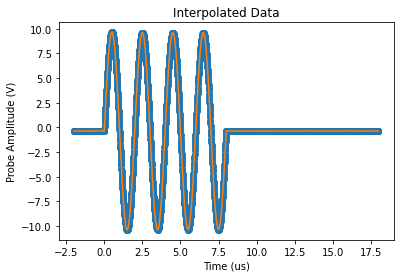

In [210]:
import matplotlib.pyplot as plt
from scipy import interpolate

# Raw Interpolated:

x = GS_4.time*1e6
y = GS_4.data
f = interpolate.interp1d(x, y)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
xnew = np.linspace(x[0], x[-1], len(x)*2)

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.xlabel('Time (us)')
plt.ylabel('Probe Amplitude (V)')
plt.title('Interpolated Data')

Text(0.5, 1.0, 'Interpolated Data FFT')

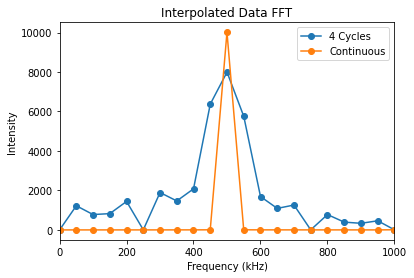

In [319]:
# FFT
n_GS_4_interp=np.size(xnew)
dt_GS_4_interp=(xnew[2]-xnew[1])
f_GS_4_interp=np.fft.fftshift(np.fft.fftfreq(n_GS_4_interp,d=dt_GS_4_interp))*1000
FT_GS_4_interp=np.fft.fftshift(np.fft.fft(ynew - np.mean(ynew)))

plt.plot(f_GS_4_interp,np.abs(FT_GS_4_interp),'-o', label="4 Cycles")
plt.plot(f_GS_C,np.abs(FT_GS_C),'-o', label="Continuous")

plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Interpolated Data FFT')

Text(0.5, 1.0, 'Padding and Decimation of 4 cycle FFT')

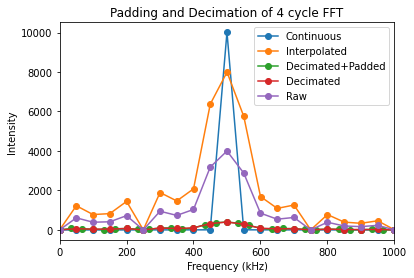

In [291]:
# condensed all onto one plot:
plt.plot(f_GS_C,np.abs(FT_GS_C),'-o', label="Continuous")
plt.plot(f_GS_4_interp,np.abs(FT_GS_4_interp),'-o', label="Interpolated")
plt.plot(f_GS_4_pad,np.abs(FT_GS_4_pad),'-o', label="Decimated+Padded")
plt.plot(f_GS_4_dec,np.abs(FT_GS_4_dec),'-o', label="Decimated")
plt.plot(f_GS_4,np.abs(FT_GS_4),'-o', label="Raw")

plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Padding and Decimation of 4 cycle FFT')
#plt.savefig("Pad&Dec_GS.jpg",dpi=300)

Text(0.5, 1.0, 'Padding and Decimation of 4 cycle FFT - Normalized')

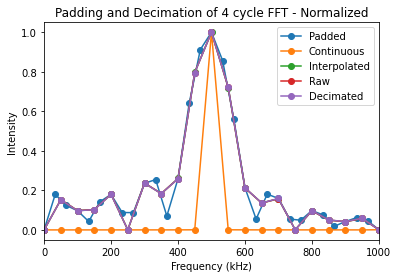

In [292]:
plt.plot(f_GS_4_pad,np.abs(FT_GS_4_pad)/max(np.abs(FT_GS_4_pad)),'-o', label="Padded")
plt.plot(f_GS_C,np.abs(FT_GS_C)/max(np.abs(FT_GS_C)),'-o', label="Continuous")
plt.plot(f_GS_4_interp,np.abs(FT_GS_4_interp)/max(np.abs(FT_GS_4_interp)),'-o', label="Interpolated")
plt.plot(f_GS_4,np.abs(FT_GS_4)/max(np.abs(FT_GS_4)),'-o', label="Raw")
plt.plot(f_GS_4_dec,np.abs(FT_GS_4_dec)/max(np.abs(FT_GS_4_dec)),'-o', label="Decimated")


plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Padding and Decimation of 4 cycle FFT - Normalized')
#plt.savefig("Pad&Dec_GS.jpg",dpi=300)

In [293]:
f_GS_4_dec[5] - f_GS_4_dec[4]

50.00000000000091

In [294]:
f_GS_4_pad[2] - f_GS_4_pad[1]

33.33333333333303

In [295]:
f_GS_4[2] - f_GS_4[1]

50.0

In [296]:
f_GS_4_interp[2] - f_GS_4_interp[1]

50.012506253129686

# Pad continuous data to find peak position

Text(0.5, 1.0, 'Continuous Padded Data')

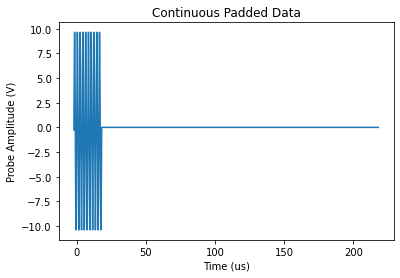

In [350]:

# 1) Pad Continuous Data

zero_num = 20000   # number of zero points we want to add
y_Cpad = np.pad(GS_C.data,zero_num) # np.pad adds zero to both ends
y_Cpad = y_Cpad[zero_num:len(y_Cpad)]   # cut the leading zeros

dx = GS_C.time[2]-GS_C.time[1]   # dt, spacing between time points
newtimes = np.zeros(zero_num)
for i in range(1,zero_num + 1):      # extend time array to accomodate padding
    newtimes[i-1]= GS_C.time[len(GS_C.time)-1] + i*dx

x_Cpad = np.append(GS_C.time,newtimes)

plt.plot(x_Cpad*1e6,y_Cpad)
plt.xlabel('Time (us)')
plt.ylabel('Probe Amplitude (V)')
plt.title('Continuous Padded Data')

In [351]:
x_Cpad[-1]*1e6

217.9899999999981

In [352]:
x_pad[-1]*1e6

217.9000000000002

In [353]:
GS_C.time[2]-GS_C.time[1]

9.999999999999904e-09

Text(0.5, 1.0, 'Continuous Padded FFT')

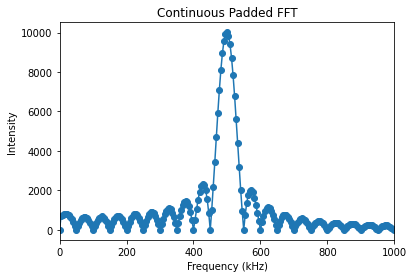

In [354]:
n_GS_Cpad=np.size(x_Cpad)
dt_GS_Cpad=(x_Cpad[2]-x_Cpad[1])*1e6
f_GS_Cpad=np.fft.fftshift(np.fft.fftfreq(n_GS_Cpad,d=dt_GS_Cpad))*1000
FT_GS_Cpad=np.fft.fftshift(np.fft.fft(y_Cpad.data - np.mean(y_Cpad)))

plt.plot(f_GS_Cpad,np.abs(FT_GS_Cpad),'-o')

plt.xlim([0,1000])
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Continuous Padded FFT')
#plt.savefig("Pad&Dec_GS.jpg",dpi=300)

In [355]:
# How to find frequency at peak:
f_GS_Cpad[np.argmax(np.abs(FT_GS_Cpad))]

500.0000000000048

Text(0.5, 1.0, '4 cycle Raw Padded Data')

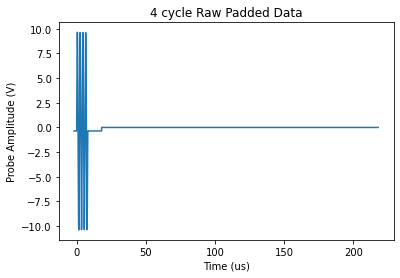

In [357]:
# 2) Pad raw data (not decimated)

zero_num = 20000   # number of zero points we want to add
y_rawpad = np.pad(GS_4.data,zero_num) # np.pad adds zero to both ends
y_rawpad = y_rawpad[zero_num:len(y_rawpad)]   # cut the leading zeros

dx = GS_4.time[2]-GS_4.time[1]   # dt, spacing between time points
newtimes = np.zeros(zero_num)
for i in range(1,zero_num + 1):      # extend time array to accomodate padding
    newtimes[i-1]= GS_4.time[len(GS_4.time)-1] + i*dx

x_rawpad = np.append(GS_4.time,newtimes)

plt.plot(x_rawpad*1e6,y_rawpad)
plt.xlabel('Time (us)')
plt.ylabel('Probe Amplitude (V)')
plt.title('4 cycle Raw Padded Data')

Text(0.5, 1.0, 'Padding Only - 4 cycle FFT')

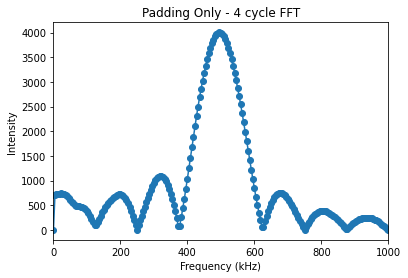

In [358]:
n_GS_4_rawpad=np.size(x_rawpad)
dt_GS_4_rawpad=(x_rawpad[2]-x_rawpad[1])*1e6
f_GS_4_rawpad=np.fft.fftshift(np.fft.fftfreq(n_GS_4_rawpad,d=dt_GS_4_rawpad))*1000
FT_GS_4_rawpad=np.fft.fftshift(np.fft.fft(y_rawpad - np.mean(y_rawpad)))

plt.plot(f_GS_4_rawpad,np.abs(FT_GS_4_rawpad),'-o')

plt.xlim([0,1000])
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Padding Only - 4 cycle FFT')
#plt.savefig("Pad&Dec_GS.jpg",dpi=300)

In [361]:
f_GS_4_rawpad[np.argmax(np.abs(FT_GS_4_rawpad))]

-495.45454545455016

Text(0.5, 1.0, 'Padding Comparison - FFT')

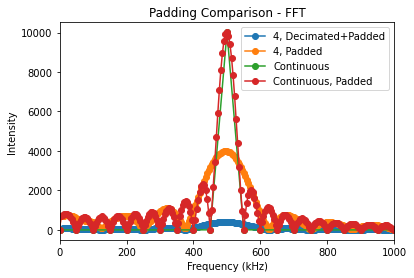

In [360]:
# 3) compare padded to decimated + padded 
plt.plot(f_GS_4_pad,np.abs(FT_GS_4_pad),'-o', label="4, Decimated+Padded")
plt.plot(f_GS_4_rawpad,np.abs(FT_GS_4_rawpad),'-o', label="4, Padded")
plt.plot(f_GS_C,np.abs(FT_GS_C),'-o', label="Continuous")

plt.plot(f_GS_Cpad,np.abs(FT_GS_Cpad),'-o', label="Continuous, Padded")

plt.legend()
plt.xlim([0,1000])
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Padding Comparison - FFT')
#plt.savefig("Pad&Dec_GS.jpg",dpi=300)


In [331]:
f_GS_4_pad[np.argmax(np.abs(FT_GS_4_pad))]

-499.99999999999943

In [332]:
f_GS_4_rawpad[2]-f_GS_4_rawpad[1]

8.333333333335759

In [333]:
f_GS_C[np.argmax(np.abs(FT_GS_C))]

-500.0000000000048

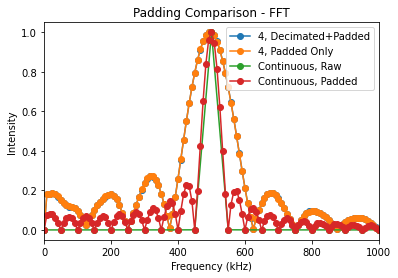

In [334]:
# Normalized



plt.plot(f_GS_4_pad,np.abs(FT_GS_4_pad)/max(np.abs(FT_GS_4_pad)),'-o', label="4, Decimated+Padded")
plt.plot(f_GS_4_rawpad,np.abs(FT_GS_4_rawpad)/max(np.abs(FT_GS_4_rawpad)),'-o', label="4, Padded Only")
plt.plot(f_GS_C,np.abs(FT_GS_C)/max(np.abs(FT_GS_C)),'-o', label="Continuous, Raw")
plt.plot(f_GS_Cpad,np.abs(FT_GS_Cpad)/max(np.abs(FT_GS_Cpad)),'-o', label="Continuous, Padded")

plt.legend()
plt.xlim([0,1000])
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Padding Comparison - FFT')
plt.savefig("Pad&Dec_GS_norm.jpg",dpi=300)

In [335]:
f_GS_4_rawpad[2]-f_GS_4_rawpad[1]

8.333333333335759

In [336]:
f_GS_4_pad[2]-f_GS_4_pad[1]

8.33333333333303

In [337]:
f_GS_Cpad[2]-f_GS_Cpad[1]

8.333333333335759

In [338]:
f_GS_C[2]-f_GS_C[1]

50.0

In [339]:
f_GS_4_pad[np.argmax(np.abs(FT_GS_4_pad))]

-499.99999999999943

In [305]:
len(x_pad)

300

In [306]:
len(x_rawpad)

3000

In [307]:
len(x_Cpad)

3000